# Data Loading, Storage and File Formats 

Problem Statement: Analyzing Sales Data from Multiple File Formats 
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON) 
Description: The goal is to load and analyze sales data from different file formats, including 
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the 
dataset. 
  
Tasks to Perform: 

 Obtain sales data files in various formats, such as CSV, Excel, and JSON. 
 
1. Load the sales data from each file format into the appropriate data structures or 
   dataframes.
   
2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
   missing values, or data quality issues. 
   
3. Perform data cleaning operations, such as handling missing values, removing 
   duplicates, or correcting inconsistencies. 
   
4. Convert the data into a unified format, such as a common dataframe or data structure, 
   to enable seamless analysis. 
   
5. Perform data transformation tasks, such as merging multiple datasets, splitting 
   columns, or deriving new variables. 
   
6. Analyze the sales data by performing descriptive statistics, aggregating data by 
   specific variables, or calculating metrics such as total sales, average order value, or 
   product category distribution. 
   
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales 
   data and gain insights into sales trends, customer behavior, or product performance. 

# 1 Load the sales data from each file format into the appropriate data structures or dataframes.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
csv= pd.read_csv('customers.csv')

In [9]:
xl= pd.read_excel('customers.xlsx')

# 2. Explore the structure and content of the loaded data, identifying any inconsistencies, missing values, or data quality issues.

In [11]:
csv.info()
csv.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   email       1000 non-null   object 
 3   phone       1000 non-null   object 
 4   address     1000 non-null   object 
 5   gender      1000 non-null   object 
 6   age         1000 non-null   int64  
 7   registered  1000 non-null   object 
 8   orders      1000 non-null   int64  
 9   spent       1000 non-null   float64
 10  job         1000 non-null   object 
 11  hobbies     1000 non-null   object 
 12  is_married  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 94.9+ KB


,age,orders,spent
count,1000.00000,1000.000000,1000.000000
mean,48.14500,10.036000,496.295100
std,18.35246,6.175665,289.229235
min,18.00000,0.000000,0.490000
25%,32.00000,5.000000,248.100000
50%,47.00000,10.000000,469.045000
75%,64.00000,15.000000,739.660000
max,80.00000,20.000000,999.150000


In [12]:
csv.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married
0,Joseph,Rice,josephrice131@slingacademy.com,+1-800-040-3135x6208,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False
1,Gary,Moore,garymoore386@slingacademy.com,221.945.4191x8872,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True
2,John,Walker,johnwalker944@slingacademy.com,388-142-4883x5370,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False
3,Eric,Carter,ericcarter176@slingacademy.com,(451)259-5402,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False
4,William,Jackson,williamjackson427@slingacademy.com,625.626.9133x374,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False


In [13]:
csv.isnull().sum()

first_name    0
last_name     0
email         0
phone         0
address       0
gender        0
age           0
registered    0
orders        0
spent         0
job           0
hobbies       0
is_married    0
dtype: int64

In [14]:
csv.duplicated().sum()

0

# 3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.

In [16]:
csv.fillna(csv.mean(),inplace=True) #handle missing values

C:\Users\rohan\AppData\Local\Temp\ipykernel_1588\4116971747.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  csv.fillna(csv.mean(),inplace=True) #handle missing values


In [17]:
#remove duplicates
csv.drop_duplicates(inplace=True)

In [19]:
csv.columns

Index(['first_name', 'last_name', 'email', 'phone', 'address', 'gender', 'age',
       'registered', 'orders', 'spent', 'job', 'hobbies', 'is_married'],
      dtype='object')

In [24]:
#correcting the inconsistensy
# Convert column to numeric, set errors='coerce' to handle non-numeric values

csv['phone'] = pd.to_numeric(csv['phone'],errors='coerce').fillna(0).astype(int)


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [25]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   email       1000 non-null   object 
 3   phone       1000 non-null   int32  
 4   address     1000 non-null   object 
 5   gender      1000 non-null   object 
 6   age         1000 non-null   int64  
 7   registered  1000 non-null   object 
 8   orders      1000 non-null   int64  
 9   spent       1000 non-null   float64
 10  job         1000 non-null   object 
 11  hobbies     1000 non-null   object 
 12  is_married  1000 non-null   bool   
dtypes: bool(1), float64(1), int32(1), int64(2), object(8)
memory usage: 98.6+ KB


# 4. Convert the data into a unified format, such as a common dataframe or data structure, to enable seamless analysis.

In [26]:
all_data=pd.concat([csv,xl],ignore_index=True)

In [27]:
all_data.head()

,first_name,last_name,email,phone,address,gender,age,registered,orders,spent,job,hobbies,is_married
0,Joseph,Rice,josephrice131@slingacademy.com,0,"91773 Miller Shoal\nDiaztown, FL 38841",male,43,2019-05-05,7,568.29,Artist,Playing sports,False
1,Gary,Moore,garymoore386@slingacademy.com,0,"6450 John Lodge\nTerriton, KY 95945",male,71,2020-05-20,11,568.92,Artist,Swimming,True
2,John,Walker,johnwalker944@slingacademy.com,0,"27265 Murray Island\nKevinfort, PA 63231",male,44,2020-04-04,11,497.12,Clerk,Painting,False
3,Eric,Carter,ericcarter176@slingacademy.com,0,USNS Knight\nFPO AA 76532,male,38,2019-01-30,17,834.60,Butcher,Playing musical instruments,False
4,William,Jackson,williamjackson427@slingacademy.com,0,"170 Jackson Loaf\nKristenland, AS 48876",male,58,2022-07-01,14,151.59,Engineer,Reading,False


# 5. Perform data transformation tasks, such as merging multiple datasets, splitting columns, or deriving new variables

In [28]:
# Convert Order Date to datetime format
all_data['registered']=pd.to_datetime(all_data['registered'])

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  2000 non-null   object        
 1   last_name   2000 non-null   object        
 2   email       2000 non-null   object        
 3   phone       2000 non-null   object        
 4   address     2000 non-null   object        
 5   gender      2000 non-null   object        
 6   age         2000 non-null   int64         
 7   registered  2000 non-null   datetime64[ns]
 8   orders      2000 non-null   int64         
 9   spent       2000 non-null   float64       
 10  job         2000 non-null   object        
 11  hobbies     2000 non-null   object        
 12  is_married  2000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 189.6+ KB


In [30]:
# Convert 'is_married' to boolean
all_data['is_married'] = all_data['is_married'].astype(bool)

In [31]:
#Splitting Full Name Columns
all_data['full_name']=all_data['first_name']+' '+all_data['last_name']

In [32]:
all_data['full_name']

0           Joseph Rice
1            Gary Moore
2           John Walker
3           Eric Carter
4       William Jackson
             ...       
1995    Alexis Williams
1996       Karen Mendez
1997     Michaela Smith
1998     Kathleen Scott
1999        Carl Acosta
Name: full_name, Length: 2000, dtype: object

# 6: Analyze the sales data

In [33]:
#stats
all_data.describe()

,age,orders,spent
count,2000.000000,2000.00000,2000.000000
mean,48.145000,10.03600,496.295100
std,18.347869,6.17412,289.156882
min,18.000000,0.00000,0.490000
25%,32.000000,5.00000,248.100000
50%,47.000000,10.00000,469.045000
75%,64.000000,15.00000,739.660000
max,80.000000,20.00000,999.150000


# 7. Create visualization

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# total sales by product category
if 'category' in all_data.columns:
    total_sales_by_category=all_data.groupby('category')['spent'].sum().reset_index()
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='category',y='spent',data=total_sales_by_category)
    plt.tile('total_sales_by_category')
    plt.xlabel('product category')
    plt.ylabel('total sales')
    plt.show()

In [36]:
if 'category' in all_data.columns:
    category_distribution = all_data['category'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title('Product Category Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

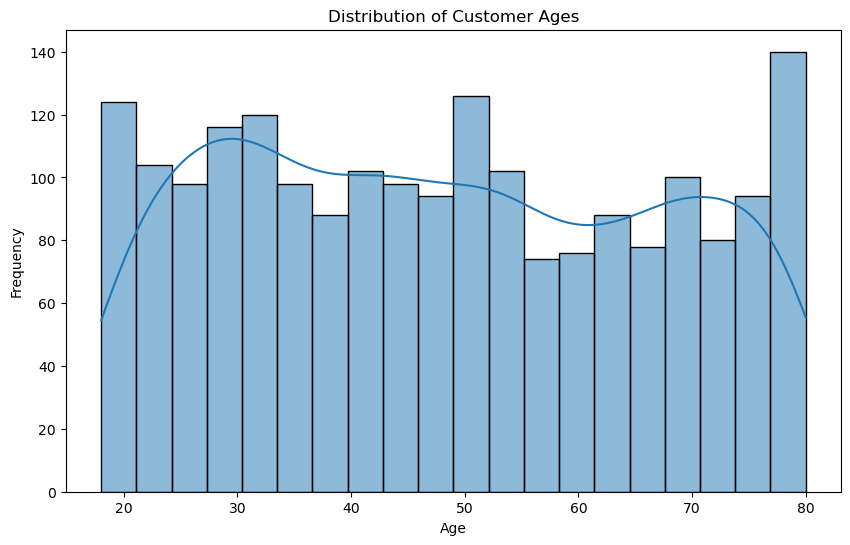

In [37]:
# Histogram to show distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(all_data['age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

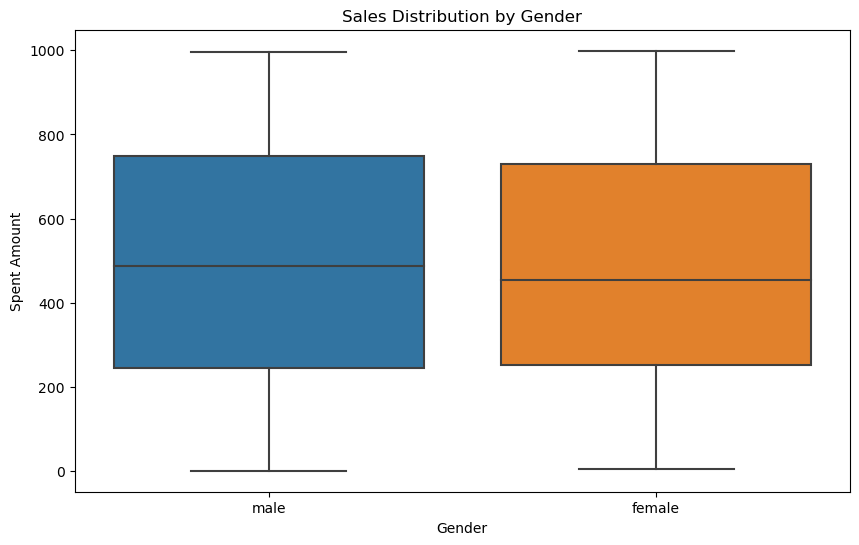

In [38]:
# Box plot to show sales distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='spent', data=all_data)
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spent Amount')
plt.show()
